<a href="https://colab.research.google.com/github/a-donat/Benchmarks_PyCaret/blob/main/Predicting_Power_Plant_Output.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I. Set-Up

## I.A. Import Libraries and Download Data

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d gauravduttakiit/power-plant-data
! unzip '/content/power-plant-data.zip' -d '/content/data'

In [ ]:
! pip install pycaret

In [3]:
#import matplotlib.pyplot as plt
#import seaborn as sns
#import VisualizeDataAbbrev as viz

import numpy as np
import pandas as pd
from pycaret.regression import *
from sklearn.model_selection import train_test_split

## I.B. Load Data and Check Data Integrity

In [17]:
ds_df = pd.read_csv("/content/data/Training_set_ccpp.csv")

In [18]:
ds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6410 entries, 0 to 6409
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      6410 non-null   float64
 1   EV      6410 non-null   float64
 2   AP      6410 non-null   float64
 3   RH      6410 non-null   float64
 4   PE      6410 non-null   float64
dtypes: float64(5)
memory usage: 250.5 KB


In [19]:
ds_df.nunique()

AT    2536
EV     613
AP    2255
RH    3757
PE    3910
dtype: int64

In [20]:
ds_df.corr().round(2)

,AT,EV,AP,RH,PE
AT,1.00,0.84,-0.51,-0.55,-0.95
EV,0.84,1.00,-0.41,-0.31,-0.87
AP,-0.51,-0.41,1.00,0.11,0.51
RH,-0.55,-0.31,0.11,1.00,0.39
PE,-0.95,-0.87,0.51,0.39,1.00



# II. Preprocessing

In [21]:
train_df, test_df = train_test_split(
    ds_df, test_size=0.20, random_state=1)

# III. Create Models

In [22]:
reg_models = setup(data=train_df, target="PE", session_id=123)


,Description,Value
0,Session id,123
1,Target,PE
2,Target type,Regression
3,Original data shape,"(5128, 5)"
4,Transformed data shape,"(5128, 5)"
5,Transformed train set shape,"(3589, 5)"
6,Transformed test set shape,"(1539, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


In [23]:
best_model = compare_models(fold=5)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,2.5923,12.0691,3.4712,0.9585,0.0077,0.0057,0.3780
lightgbm,Light Gradient Boosting Machine,2.6666,12.4960,3.5323,0.9570,0.0078,0.0059,0.6160
et,Extra Trees Regressor,2.6736,12.8655,3.5823,0.9558,0.0079,0.0059,0.7100
rf,Random Forest Regressor,2.7206,13.2925,3.6432,0.9543,0.0080,0.0060,1.5120
gbr,Gradient Boosting Regressor,2.9682,14.5923,3.8170,0.9498,0.0084,0.0065,0.4780
knn,K Neighbors Regressor,3.2531,18.1228,4.2533,0.9377,0.0093,0.0072,0.0540
lar,Least Angle Regression,3.6073,19.8778,4.4556,0.9316,0.0098,0.0080,0.0420
br,Bayesian Ridge,3.6074,19.8779,4.4556,0.9316,0.0098,0.0080,0.0420
ridge,Ridge Regression,3.6073,19.8778,4.4556,0.9316,0.0098,0.0080,0.0420
lr,Linear Regression,3.6073,19.8778,4.4556,0.9316,0.0098,0.0080,1.0640


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

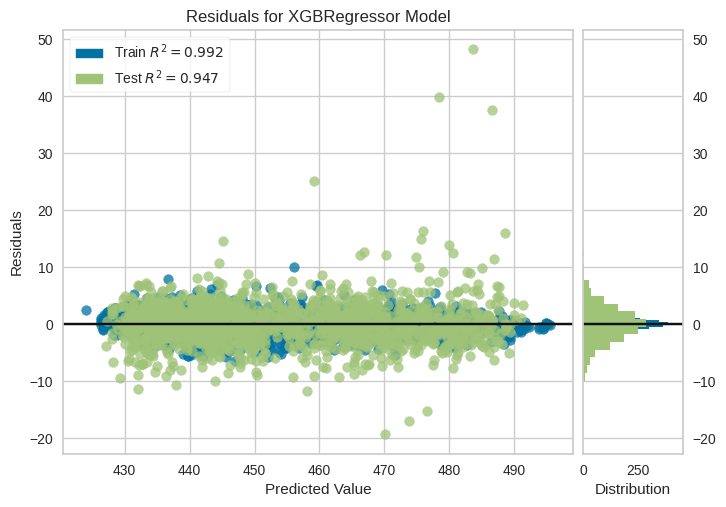

In [24]:
plot_model(best_model)